# Load Data

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [3]:
data_batch_1 = unpickle(r'C:\Users\sjm\Desktop\Data\cifar-10-batches-py\data_batch_1')
data_batch_2 = unpickle(r'C:\Users\sjm\Desktop\Data\cifar-10-batches-py\data_batch_2')
data_batch_3 = unpickle(r'C:\Users\sjm\Desktop\Data\cifar-10-batches-py\data_batch_3')
data_batch_4 = unpickle(r'C:\Users\sjm\Desktop\Data\cifar-10-batches-py\data_batch_4')
data_batch_5 = unpickle(r'C:\Users\sjm\Desktop\Data\cifar-10-batches-py\data_batch_5')
test_batch = unpickle(r'C:\Users\sjm\Desktop\Data\cifar-10-batches-py\test_batch')
batches_meta = unpickle(r'C:\Users\sjm\Desktop\Data\cifar-10-batches-py\batches.meta')

In [4]:
# generate train_x, train_y, test_x, test_y

x1 = pd.DataFrame(data_batch_1['data'])
x2 = pd.DataFrame(data_batch_2['data'])
x3 = pd.DataFrame(data_batch_3['data'])
x4 = pd.DataFrame(data_batch_4['data'])
x5 = pd.DataFrame(data_batch_5['data'])

train_x = pd.concat([x1, x2, x3, x4, x5], axis = 0) /255.0
test_x = pd.DataFrame(test_batch['data']) /255.0
train_x = train_x.values.reshape(len(train_x), 3, 32, 32).transpose(0, 2, 3, 1)
test_x = test_x.values.reshape(len(test_x), 3, 32, 32).transpose(0, 2, 3, 1)

y1 = pd.DataFrame(data_batch_1['labels'])
y2 = pd.DataFrame(data_batch_2['labels'])
y3 = pd.DataFrame(data_batch_3['labels'])
y4 = pd.DataFrame(data_batch_4['labels'])
y5 = pd.DataFrame(data_batch_5['labels'])

train_y = pd.concat([y1, y2, y3, y4, y5], axis = 0)
train_y = train_y.values.reshape(len(train_y),)
test_y = pd.DataFrame(test_batch['labels'])
test_y = test_y.values.reshape(len(test_y),)

label_names = batches_meta['label_names'] # label names

train_x.shape, train_y.shape, test_x.shape, test_y.shape

((50000, 32, 32, 3), (50000,), (10000, 32, 32, 3), (10000,))

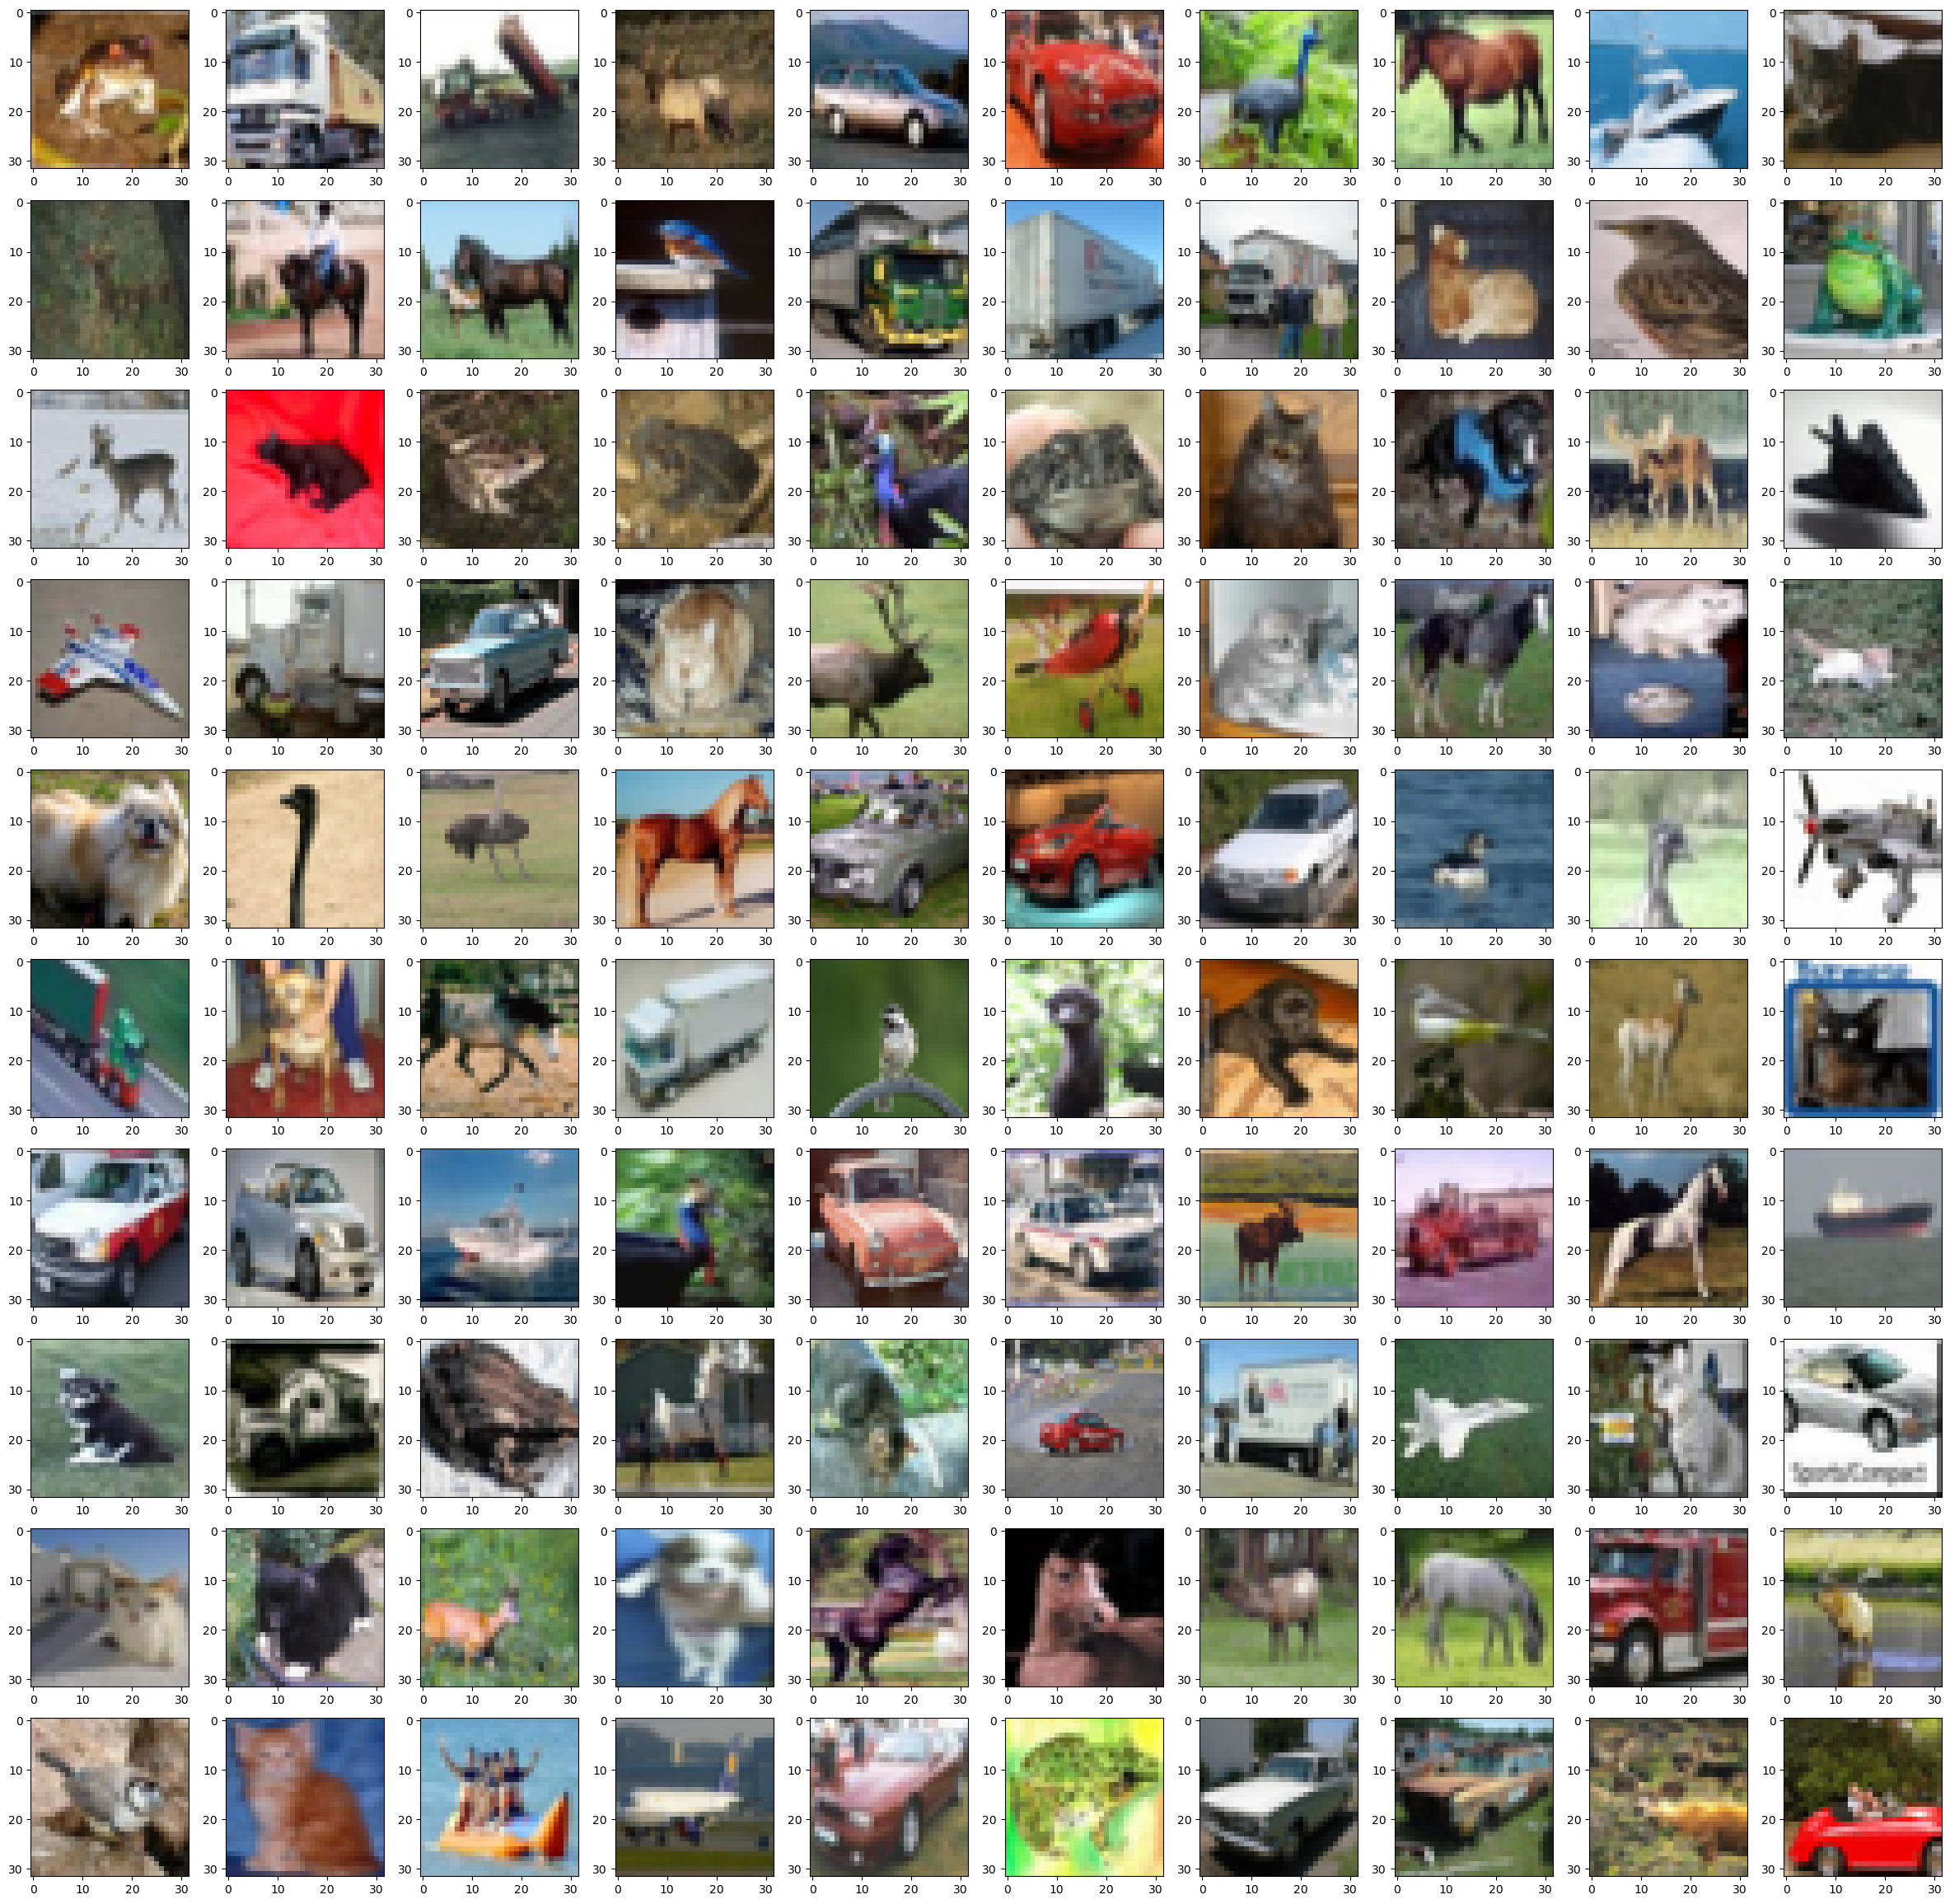

In [5]:
fig = plt.figure(figsize = (30,30), dpi = 100)

for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    plt.imshow(train_x[i])
plt.show()

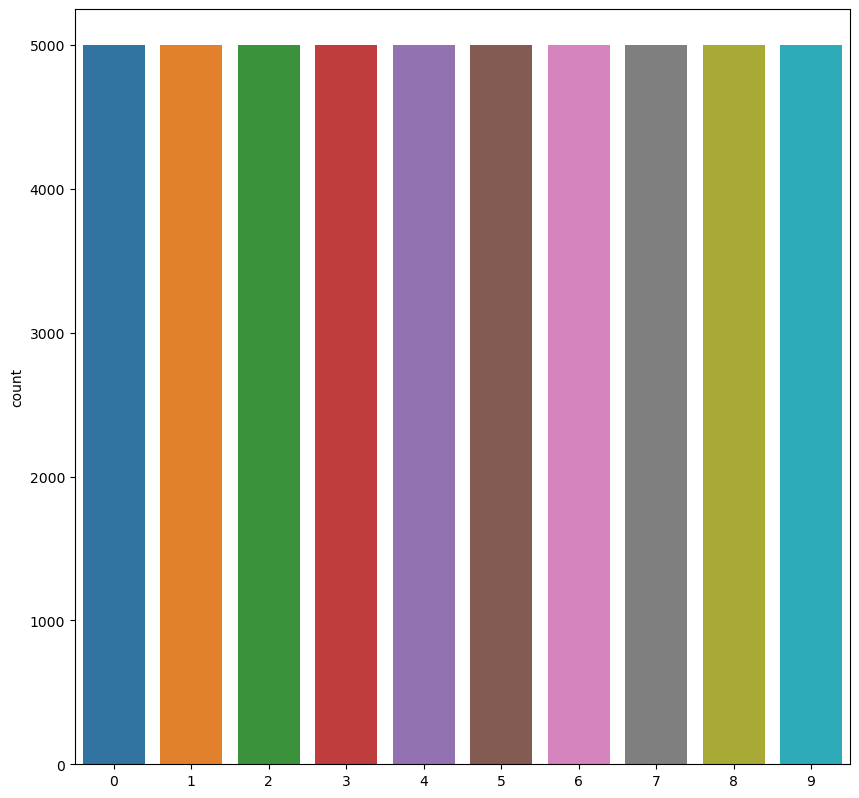

In [6]:
plt.figure(figsize = (10,10), dpi = 100)
sns.countplot(train_y)
plt.show()

In [7]:
from keras.utils import to_categorical

train_y = to_categorical(train_y, num_classes = len(label_names))

train_y.shape, test_y.shape

Using TensorFlow backend.


((50000, 10), (10000,))

# Modeling

In [8]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Input, Dropout, BatchNormalization, Activation, Concatenate

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [9]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)
mc = ModelCheckpoint('model.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)

In [35]:
# simple cnn
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), input_shape = (32, 32, 3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (5,5), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 128, kernel_size = (5,5), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 128, kernel_size = (5,5), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 32, 32, 64)        4864      
_________________________________________________________________
batch_normalization_45 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_54 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 32, 32, 64)        102464    
_________________________________________________________________
batch_normalization_46 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_55 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 32, 32, 64)       

In [36]:
model.fit(train_x, train_y, batch_size=128, epochs=20, callbacks=[es, mc], validation_split = 0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
44928/45000 [============================>.] - ETA: 0s - loss: 2.1035 - acc: 0.2466
Epoch 00001: val_acc did not improve from 0.82500
45000/45000 [==============================] - 37s 817us/sample - loss: 2.1027 - acc: 0.2467 - val_loss: 2.4128 - val_acc: 0.2214
Epoch 2/20
44928/45000 [============================>.] - ETA: 0s - loss: 1.4881 - acc: 0.4448
Epoch 00002: val_acc did not improve from 0.82500
45000/45000 [==============================] - 36s 793us/sample - loss: 1.4880 - acc: 0.4447 - val_loss: 1.7233 - val_acc: 0.3384
Epoch 3/20
44928/45000 [============================>.] - ETA: 0s - loss: 1.1816 - acc: 0.5708
Epoch 00003: val_acc did not improve from 0.82500
45000/45000 [==============================] - 36s 797us/sample - loss: 1.1818 - acc: 0.5708 - val_loss: 1.5052 - val_acc: 0.4726
Epoch 4/20
44928/45000 [============================>.] - ETA: 0s - loss: 0.9717 - acc: 0.6500
Epoch 00004: val_acc did not im

# Evaluation

In [38]:
pred = model.predict(test_x)
pred = np.argmax(pred, axis = 1)

In [39]:
from sklearn.metrics import accuracy_score

print("Accuracy :", accuracy_score(test_y, pred))

Accuracy : 0.7721
